In [7]:
# Importing libraries
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
%matplotlib inline

df_train = pd.read_csv('/home/pradeep/Desktop/digit/digit-recognizer-dataset/train.csv')
df_test = pd.read_csv('/home/pradeep/Desktop/digit/digit-recognizer-dataset/test.csv')

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

In [8]:
df_train = pd.read_csv('/home/pradeep/Desktop/digit/digit-recognizer-dataset/train.csv')
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_test = pd.read_csv('/home/pradeep/Desktop/digit/digit-recognizer-dataset/test.csv')
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
features = df_train.iloc[:, 1:].values.reshape(len(df_train), 28, 28, 1)
y = df_train.iloc[:, 0].values

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

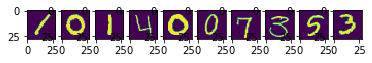

In [12]:
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(df_train.iloc[:, 1:].values[i].reshape(28, 28))

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [14]:
labels = keras.utils.to_categorical(y, num_classes=10)

In [15]:
features = np.array(features)
labels  = np.array(labels)

In [16]:
from keras.preprocessing import image

train_generator = image.ImageDataGenerator()

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=92)

batches = train_generator.flow(x_train, y_train, batch_size=64)
val_batches = train_generator.flow(x_test, y_test, batch_size=64)

In [17]:
# ## Convulational Modal
from tensorflow.keras.optimizers import RMSprop


model = Sequential()


model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=["accuracy"])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)       

In [19]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)
history = model.fit_generator(
      generator=batches, 
      steps_per_epoch=batches.n,
      epochs=0, 
      validation_data=val_batches,
      validation_steps=val_batches.n)

Train on 37800 samples, validate on 4200 samples
Epoch 1/5
37800/37800 [==============================] - 84s 2ms/step - loss: 0.1983 - accuracy: 0.9391 - val_loss: 0.0734 - val_accuracy: 0.9783
Epoch 2/5
37800/37800 [==============================] - 85s 2ms/step - loss: 0.0720 - accuracy: 0.9780 - val_loss: 0.0510 - val_accuracy: 0.9852
Epoch 3/5
37800/37800 [==============================] - 87s 2ms/step - loss: 0.0555 - accuracy: 0.9839 - val_loss: 0.0428 - val_accuracy: 0.9862
Epoch 4/5
37800/37800 [==============================] - 89s 2ms/step - loss: 0.0497 - accuracy: 0.9857 - val_loss: 0.0560 - val_accuracy: 0.9836
Epoch 5/5
37800/37800 [==============================] - 99s 3ms/step - loss: 0.0417 - accuracy: 0.9881 - val_loss: 0.0547 - val_accuracy: 0.9862


In [25]:
test_data = df_test.values.reshape(len(df_test), 28, 28, 1)
# predections = model.predict(test_data)
rounded_predections = model.predict_classes(test_data)
rounded_predections
#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

In [26]:
model.save('mnist.h5')

In [30]:
df_test.index += 1
submission = pd.DataFrame({"ImageId" :df_test.index.values, "Label": rounded_predections})
submission.to_csv('submission.csv', index=False)

In [22]:
#from google.colab import files

#uploaded = files.upload()
#ignore warning messages 
#import warnings
#warnings.filterwarnings('ignore')                                                                                                                                                                                                                                  warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
files.download('submission.csv')

In [ ]:
files.download('mnist.h5')